# Diversified Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-02", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                         \
                             open      high       low   close     volume   
time                                                                       
2020-01-02 00:00:00-05:00  296.24  300.6000  295.1900  300.58   30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.5000  297.38   31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.7500  299.78   27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.4800  298.27   23877417   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.1560  303.15   29547763   
...                           ...       ...       ...     ...        ...   
2020-12-24 00:00:00-05:00  131.32  133.4600  131.1000  131.99   51675667   
2020-12-28 00:00:00-05:00  133.99  137.3400  133.5100  136.73  116008068   
2020-12-29 00:00:00-05:00  138.05  138.7890  134.3409  134.93  114407189   
2020-12-30 00:00:00-05:00  135.58  135.9900  133.4000  133.72   87788124   
2020-12-31 00:00:00-05:00  134.08  134.7400  131.7200  132.58   86901528   

                              AMT                                       ...  \
                             open      high       low   close   volume  ...   
time                                                                    ...   
2020-01-02 00:00:00-05:00  229.68  231.1499  228.0051  228.50  1205047  ...   
2020-01-03 00:00:00-05:00  227.56  229.8300  227.0000  228.63  1293710  ...   
2020-01-06 00:00:00-05:00  228.48  230.0000  227.8922  228.51  1077776  ...   
2020-01-07 00:00:00-05:00  227.13  227.5700  221.6200  223.68  1136756  ...   
2020-01-08 00:00:00-05:00  223.48  226.4850  222.5200  225.56   971756  ...   
...                           ...       ...       ...     ...      ...  ...   
2020-12-24 00:00:00-05:00  216.44  219.3900  216.1900  218.64   581627  ...   
2020-12-28 00:00:00-05:00  218.87  221.4500  217.4300  221.04  1078952  ...   
2020-12-29 00:00:00-05:00  222.21  223.4200  220.4200  220.48  1028791  ...   
2020-12-30 00:00:00-05:00  220.51  221.5300  219.3500  220.52  1144758  ...   
2020-12-31 00:00:00-05:00  219.76  224.6650  219.6000  224.30  1297773  ...   

                              VOO                                        VUG  \
                             open    high       low   close   volume    open   
time                                                                           
2020-01-02 00:00:00-05:00  297.29  298.45  296.3400  298.44  3098524  183.57   
2020-01-03 00:00:00-05:00  295.22  297.36  295.0400  296.25  2956475  182.50   
2020-01-06 00:00:00-05:00  294.42  297.42  294.3500  297.36  2645636  182.33   
2020-01-07 00:00:00-05:00  296.82  297.27  296.0611  296.52  1820121  184.69   
2020-01-08 00:00:00-05:00  296.71  299.31  296.4700  298.06  3454470  184.72   
...                           ...     ...       ...     ...      ...     ...   
2020-12-24 00:00:00-05:00  338.37  339.18  337.7700  339.17  1362634  250.56   
2020-12-28 00:00:00-05:00  341.74  342.46  341.0900  342.08  2679636  253.39   
2020-12-29 00:00:00-05:00  343.63  343.77  340.8700  341.45  2425900  254.87   
2020-12-30 00:00:00-05:00  342.28  342.91  341.5650  341.86  1745448  254.00   
2020-12-31 00:00:00-05:00  341.82  344.37  341.2300  343.62  2589798  253.09   

                                                                  
                               high       low     close   volume  
time                                                              
2020-01-02 00:00:00-05:00  184.7600  183.0900  184.7600  1055649  
2020-01-03 00:00:00-05:00  184.4389  182.3700  183.6100   903194  
2020-01-06 00:00:00-05:00  184.7800  182.1700  184.7300   777690  
2020-01-07 00:00:00-05:00  185.2300  184.2150  184.6035   909187  
2020-01-08 00:00:00-05:00  186.8500  184.5000  186.0300   641597  
...                             ...       ...       ...      ...  
2020-12-24 00:00:00-05:00  251.6600  250.3700  251.1400   354140  
2020-12-28 00:00:00-05:00  254.0100  251.4800  253.4800   694612  

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2020-01-02 00:00:00-05:00,298.44,160.73,300.58,83.980,228.50,184.7600,430.2400,1897.71,131.69,88.42
2020-01-03 00:00:00-05:00,296.25,158.59,297.38,84.260,228.63,183.6100,442.7500,1874.93,134.27,89.41
2020-01-06 00:00:00-05:00,297.36,159.02,299.78,84.160,228.51,184.7300,451.4001,1903.33,133.56,89.05
2020-01-07 00:00:00-05:00,296.52,157.60,298.27,84.070,223.68,184.6035,469.1700,1906.86,132.65,88.48
2020-01-08 00:00:00-05:00,298.06,160.14,303.15,83.970,225.56,186.0300,492.0900,1892.09,131.63,88.97
...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,339.17,222.71,131.99,88.005,218.64,251.1400,661.6600,3171.16,151.81,97.28
2020-12-28 00:00:00-05:00,342.08,224.96,136.73,87.980,221.04,253.4800,663.7700,3283.96,152.00,98.23
2020-12-29 00:00:00-05:00,341.45,224.29,134.93,88.020,220.48,252.9100,665.9800,3320.71,151.81,97.78


### Calculate the Daily Returns Per Stock in our Stock Portfolio

In [11]:
# Calculate the daily returns for every stock in the Diversified Portfolio
per_diversified_daily_returns = diversified_closing_prices_df.pct_change().dropna()
per_diversified_daily_returns

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.007338,-0.013314,-0.010646,0.003334,0.000569,-0.006224,0.029077,-0.012004,0.019591,0.011197
2020-01-06 00:00:00-05:00,0.003747,0.002711,0.008070,-0.001187,-0.000525,0.006100,0.019537,0.015147,-0.005288,-0.004026
2020-01-07 00:00:00-05:00,-0.002825,-0.008930,-0.005037,-0.001069,-0.021137,-0.000685,0.039366,0.001855,-0.006813,-0.006401
2020-01-08 00:00:00-05:00,0.005194,0.016117,0.016361,-0.001189,0.008405,0.007727,0.048852,-0.007746,-0.007689,0.005538
2020-01-09 00:00:00-05:00,0.006911,0.012177,0.021639,0.001191,0.003946,0.009246,-0.021541,0.004709,0.002431,-0.000225
...,...,...,...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,0.003788,0.007646,0.007865,0.001536,0.004918,0.002475,0.024273,-0.004886,0.003636,0.011332
2020-12-28 00:00:00-05:00,0.008580,0.010103,0.035912,-0.000284,0.010977,0.009318,0.003189,0.035571,0.001252,0.009766
2020-12-29 00:00:00-05:00,-0.001842,-0.002978,-0.013165,0.000455,-0.002533,-0.002249,0.003329,0.011191,-0.001250,-0.004581


### Calculate Aggregate Daily Returns for Portfolio

In [12]:
# Calculate the daily returns for of the Stock Portfolio
diversified_daily_returns_df = diversified_closing_prices_df.sum(axis=1).pct_change().dropna()
diversified_daily_returns_df

time
2020-01-03 00:00:00-05:00   -0.003934
2020-01-06 00:00:00-05:00    0.010770
2020-01-07 00:00:00-05:00    0.002872
2020-01-08 00:00:00-05:00    0.005150
2020-01-09 00:00:00-05:00    0.003079
                               ...   
2020-12-24 00:00:00-05:00    0.001422
2020-12-28 00:00:00-05:00    0.024499
2020-12-29 00:00:00-05:00    0.006246
2020-12-30 00:00:00-05:00   -0.001497
2020-12-31 00:00:00-05:00   -0.002221
Length: 252, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)'}, xlabel='time'>

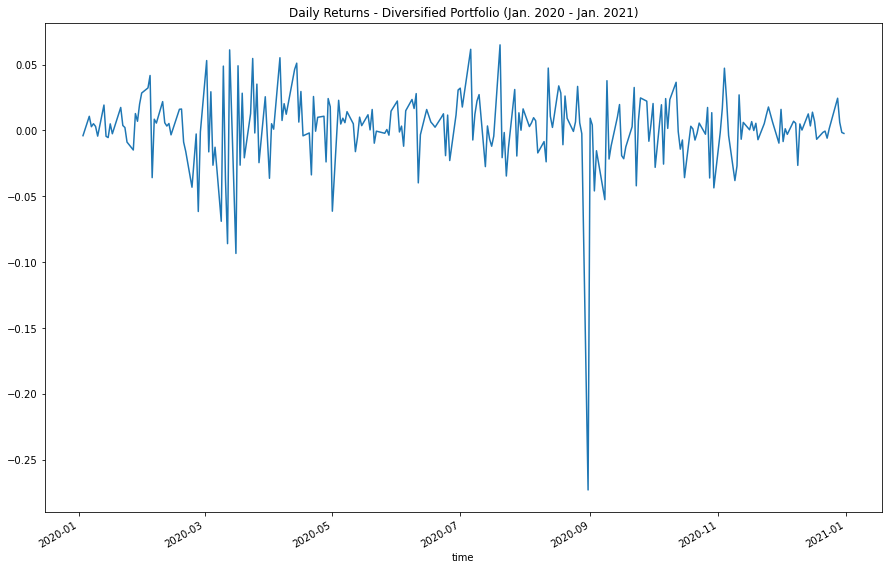

In [13]:
# Plot daily returns for the stocks portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)")

## Calculate the Cumulative Returns of the Portfolio

In [14]:
# Calculate Cumulative Returns for Diversified Portfolio
diversified_cumulative_returns_df = (1 + diversified_daily_returns_df).cumprod() - 1
diversified_cumulative_returns_df

time
2020-01-03 00:00:00-05:00   -0.003934
2020-01-06 00:00:00-05:00    0.006794
2020-01-07 00:00:00-05:00    0.009685
2020-01-08 00:00:00-05:00    0.014885
2020-01-09 00:00:00-05:00    0.018010
                               ...   
2020-12-24 00:00:00-05:00    0.401707
2020-12-28 00:00:00-05:00    0.436047
2020-12-29 00:00:00-05:00    0.445016
2020-12-30 00:00:00-05:00    0.442854
2020-12-31 00:00:00-05:00    0.439649
Length: 252, dtype: float64

### Plot Cumulative Returns for Portfolio

<AxesSubplot:title={'center':'Cumulative Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)'}, xlabel='time'>

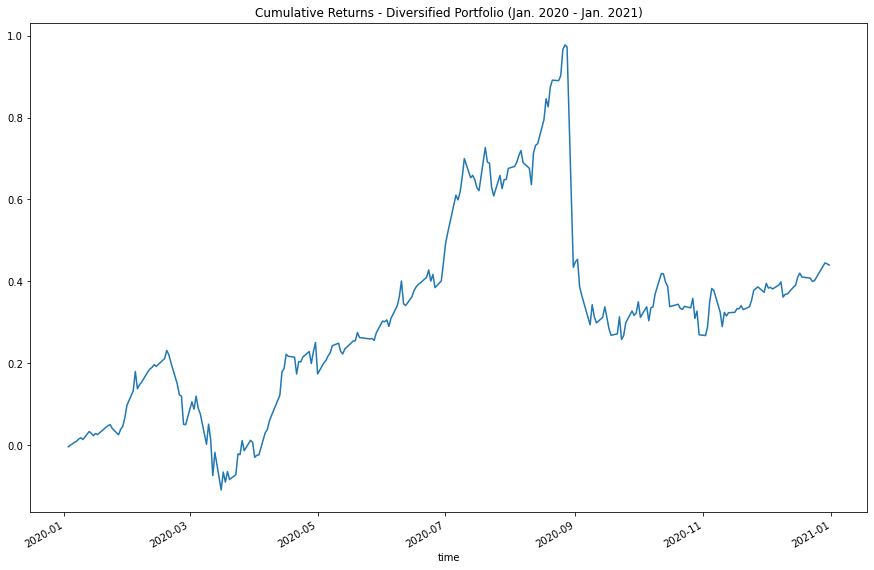

In [15]:
# Plot Cumulative Returns for Diversified Portfolio
diversified_cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Diversified Portfolio (Jan. 2020 - Jan. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [ ]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

### Run the MC Simulation for 10 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_diversified_ten_year.calc_cumulative_return()

### Plot the MC 10 Year Simulation Visualization

In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot for the diversified portfolio
MC_diversified_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization 

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_ten_year_summary_statistics = MC_diversified_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_ten_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_ten_year_lower_ci = round(MC_diversified_ten_year_summary_statistics[8]*10000, 2)
diversified_ten_year_upper_ci = round(MC_diversified_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_ten_year_lower_ci} and ${diversified_ten_year_upper_ci}")

## Set Up and Run Monte Carlo Simulation for 30 Years

In [ ]:
# Set up Monte Carlo Simulation for a 30 year time period with a $10,000 initial investment in our Diversified Portfolio
MC_diversified_thirty_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 30
)

MC_diversified_thirty_year.portfolio_data.head()

### Run the MC Simulation for 30 Years

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns for our Diversified Portfolio
MC_diversified_thirty_year.calc_cumulative_return()

### Plot the MC 30 Year Simulation Visualization

In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_diversified_thirty_year.plot_simulation()

### Plot the MC 30 Year Simulation Distribution Visualization

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_thirty_year.plot_distribution()

### Generate MC 30 Year Simulation Summary Statistics

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_thirty_year_summary_statistics = MC_diversified_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_thirty_year_summary_statistics)

### Calculate the Confidence Intervals to the 95% for the 30 year Simulation on a $10,000 initial investment

In [ ]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_thirty_year_lower_ci = round(MC_diversified_thirty_year_summary_statistics[8]*10000, 2)
diversified_thirty_year_upper_ci = round(MC_diversified_thirty_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_thirty_year_lower_ci} and ${diversified_thirty_year_upper_ci}")

## Calculate the Standard Deviation & Annualized Standard Deviation for Our Stock Portfolio

In [ ]:
# Calculate Standard Deviation for our Stock Portfolio
diversified_standard_deviation = per_diversified_daily_returns.std()
diversified_standard_deviation = diversified_standard_deviation.sort_values()
diversified_standard_deviation

### Calculate Annualized Standard Deviation

In [ ]:
# Calculate Annualized Standard Deviation for our Stock Portfolio
diversified_annualized_standard_deviation = diversified_standard_deviation * np.sqrt(252)
diversified_annualized_standard_deviation = diversified_annualized_standard_deviation.sort_values()
diversified_annualized_standard_deviation

## Calculate the Sharpe Ratio for our Stock Portfolio

### Calculate the Annualized Returns

In [ ]:
# Calculate the Annualized Returns for our Stock Portfolio 
diversified_annualized_returns = per_diversified_daily_returns.mean() * 252
diversified_annualized_returns = diversified_annualized_returns.sort_values()
diversified_annualized_returns

### Calculate the Sharpe Ratio

In [ ]:
# Calculate the Sharpe Ratio for Our Stock Portfolio
diversified_portfolio_sharpe_ratio = diversified_annualized_returns / diversified_annualized_standard_deviation
diversified_portfolio_sharpe_ratio = diversified_portfolio_sharpe_ratio.sort_values()
diversified_portfolio_sharpe_ratio

### Calculate the Overall Sharpe Ratio for our Diversified Portfolio

In [ ]:
# Calculate the Average Sharpe Ratio for our Diversified Portfolio
diversified_portfolio_average_sharpe_ratio = diversified_portfolio_sharpe_ratio.mean()
print(f"{diversified_portfolio_average_sharpe_ratio: .3f}")